In [1]:
import numpy as np
from pandas import DataFrame
from pandas import read_excel
from matplotlib import pyplot as plt

In [5]:
Accident_csv = read_excel("http://itpaper.co.kr/data/traffic.xlsx", engine="openpyxl")
Accident_csv

,년도,월,발생건수,사망자수,부상자수
0,2005,1,15494,504,25413
1,2005,2,13244,431,21635
2,2005,3,16580,477,25550
3,2005,4,17817,507,28131
4,2005,5,19085,571,29808
...,...,...,...,...,...
163,2018,8,18335,357,27749
164,2018,9,18371,348,27751
165,2018,10,19738,373,28836
166,2018,11,19029,298,28000


In [8]:
Accident_tmp = Accident_csv.filter(['년도', '발생건수', '사망자수', '부상자수'])
Accident_df = Accident_tmp.groupby(['년도']).sum()
Accident_df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


In [9]:
# 한글폰트, 그래픽 크기 설정
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (20, 10)

## 선 그래프

### 1) 인덱스가 숫자형식인 경우

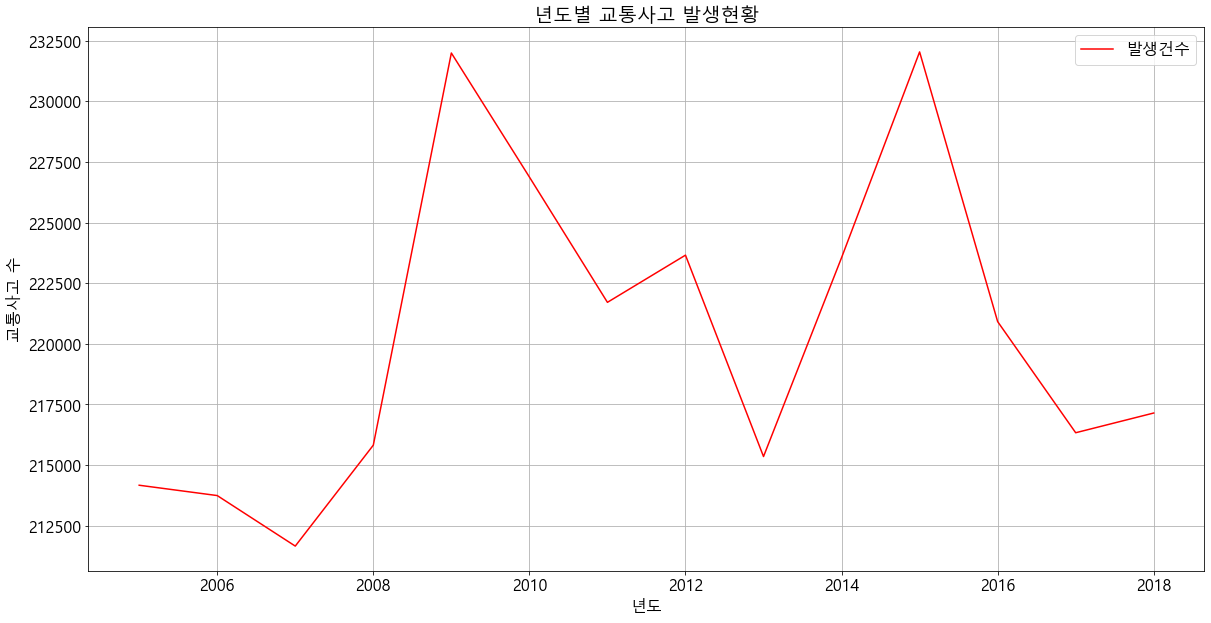

In [13]:
plt.figure()
Accident_df['발생건수'].plot(color='red')
plt.grid()
plt.legend()
plt.title('년도별 교통사고 발생현황')
plt.xlabel('년도')
plt.ylabel('교통사고 수')
plt.show()
plt.close()

In [15]:
xtext = list(Accident_df.index)
xtext

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018]

In [17]:
for i,v in enumerate(xtext):
    xtext[i] = '%d년' %v
    
xtext

['2005년',
 '2006년',
 '2007년',
 '2008년',
 '2009년',
 '2010년',
 '2011년',
 '2012년',
 '2013년',
 '2014년',
 '2015년',
 '2016년',
 '2017년',
 '2018년']

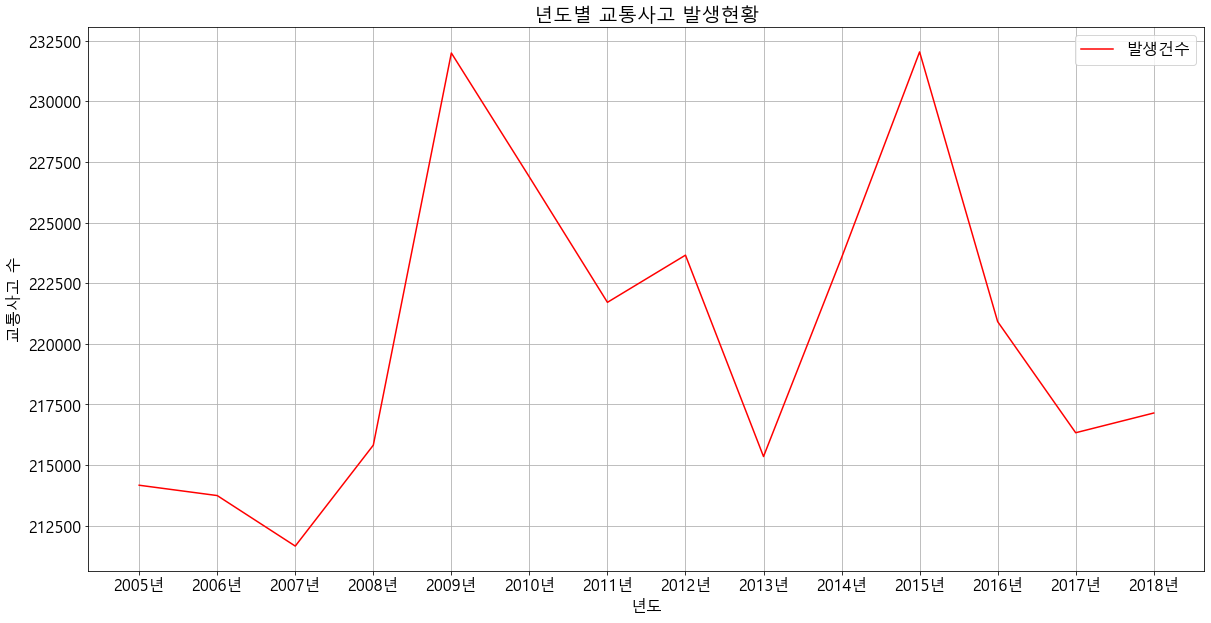

In [19]:
# x축 xticks 적용

plt.figure()
Accident_df['발생건수'].plot(color='red')
plt.grid()
plt.legend()
plt.title('년도별 교통사고 발생현황')
plt.xlabel('년도')
plt.ylabel('교통사고 수')
plt.xticks(Accident_df.index, xtext)
plt.show()
plt.close()

### 2) 인덱스가 숫자형식이 아닌 경우의 선 그래프

- 인덱스가 문자열로 구성된 경우 그래프의 x축은 0 부터 시작
- 인덱스가 숫자일때는 인덱스의 값이 x 좌표

In [29]:
Accident_copy = Accident_df.copy()

cur_index = list(Accident_copy.index)

indexDict = {}
for i,v in enumerate(xtext):
    before = cur_index[i]
    indexDict[before] = v

Accident_copy.rename(index = indexDict, inplace = True)
Accident_copy

14

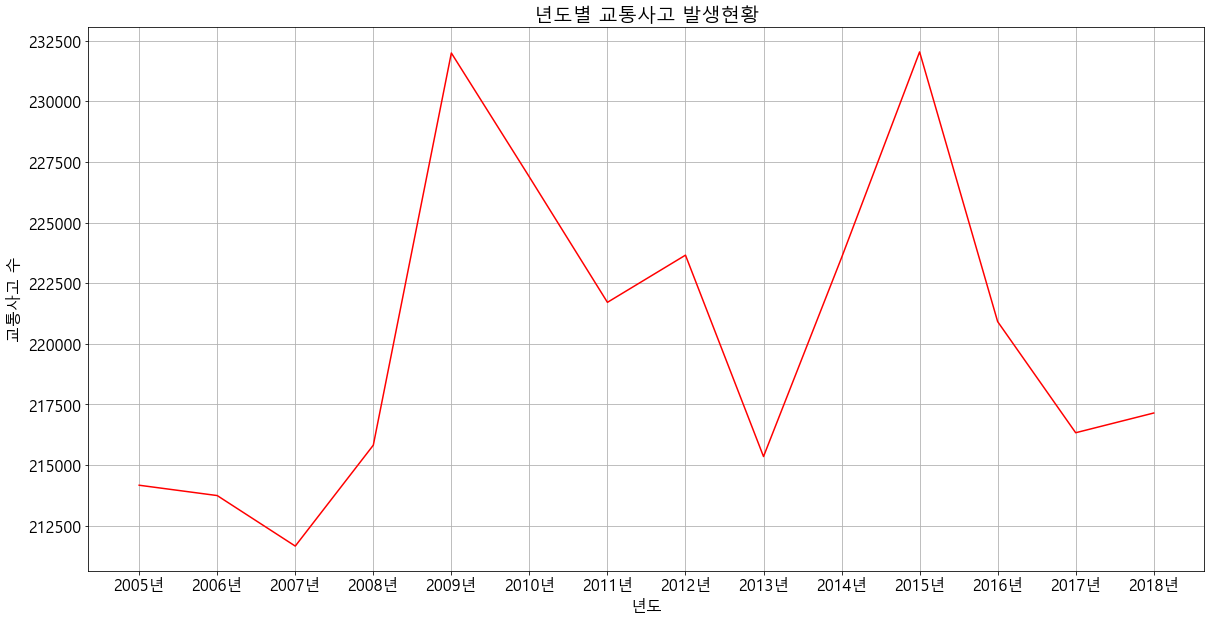

In [26]:
plt.figure()
Accident_copy['발생건수'].plot(color = 'red')
plt.grid()
plt.title('년도별 교통사고 발생현황')
plt.xlabel('년도')
plt.ylabel('교통사고 수')
plt.xticks(np.arange(len(Accident_copy)), xtext)
plt.show()

### 3) 전체 컬럼에 대한 다중 선 그래프
`plot()` 함수의 color 파라미터를 사용하여 선 색상 지정
- 단일값을 적용한 경우 모든 선이 동일한 색상으로 표시됨
- 컬럼 수 만큼 색상값을 원소로 갖는 리스트를 적용한 경우 각 선의 색상을 지정할 수 있음

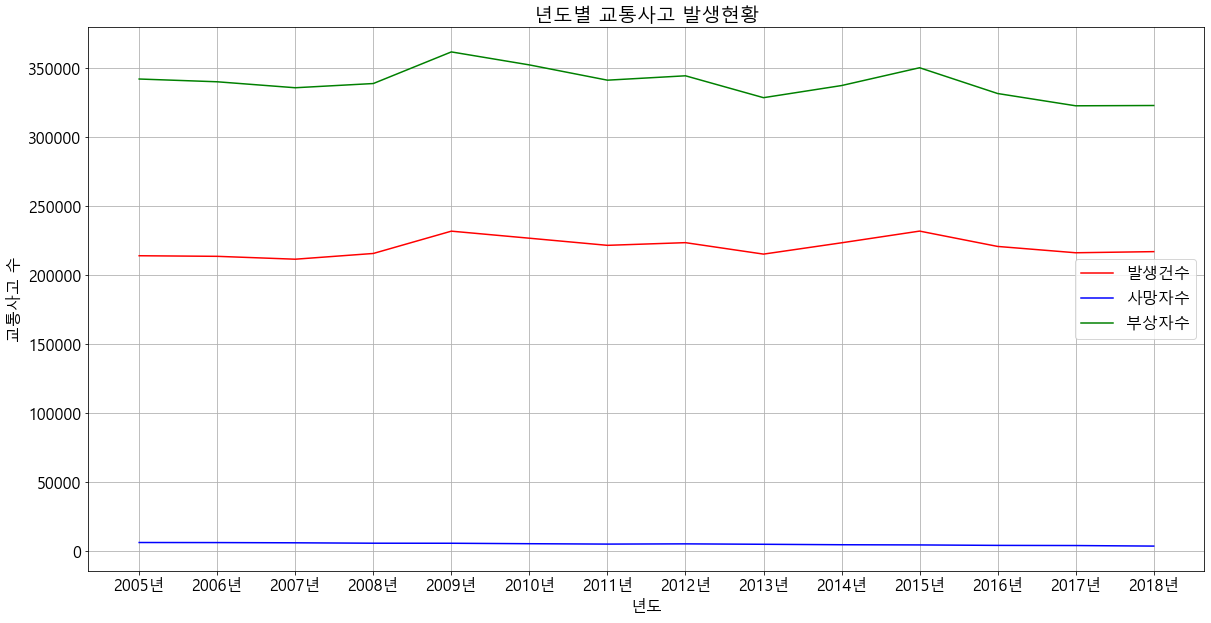

In [34]:
#Accident_df.plot()
#Accident_df.plot(color = 'red')
Accident_df.plot(color = ['red', 'blue', 'green'])
plt.grid()
plt.title('년도별 교통사고 발생현황')
plt.xlabel('년도')
plt.ylabel('교통사고 수')
plt.xticks(Accident_df.index, xtext)
plt.show()

## 04. 세로 막대 그래프
### 1) 특정 컬럼에 대한 시각화
기본 옵션만 사용하기
데이터프레임객체['컬럼'].plot.bar()
- rot 파라미터는 x축 텍스트의 각도. 기본값 90
- width 파라미터는 모든 막대가 공백없이 꽉 찬 상태를 1로 하여 비율적으로 지정. 기본값은 0.5
막대그래프는 index의 데이터 타입이 숫자, 문자열에 상관없이 x축이 0부터 시작되는 좌표계를 갖는다.

그러므로 xticks() 함수를 사용할 때 반드시 x축 좌표에 대한 지정이 이루어져야 한다.

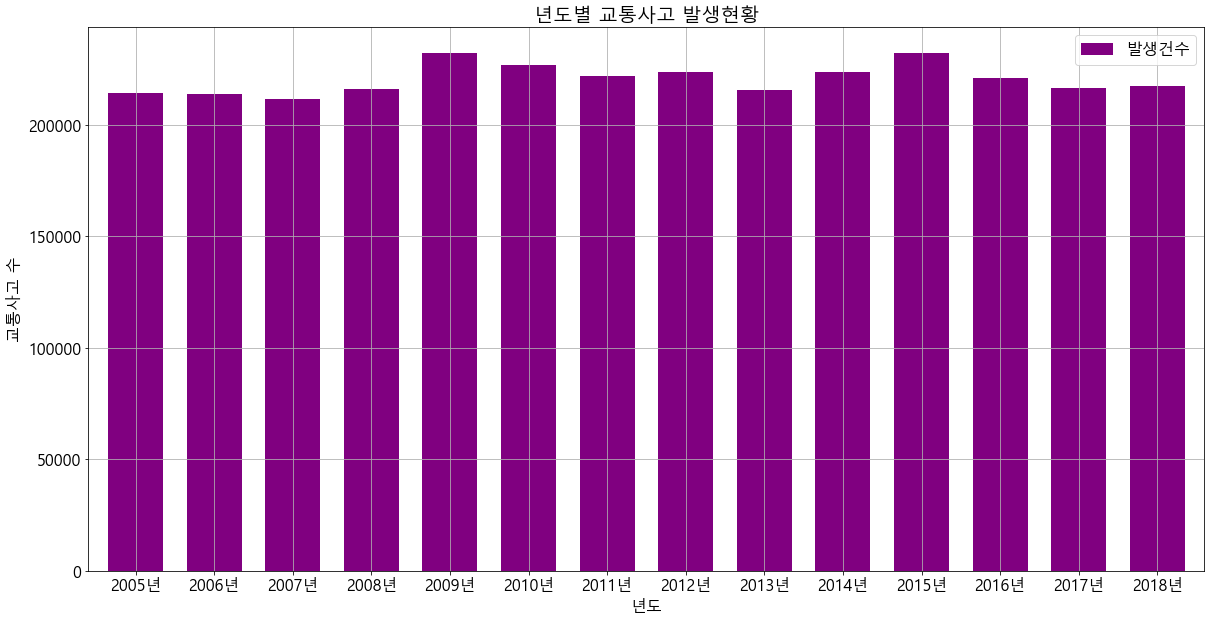

In [38]:
xpos = np.arange(len(Accident_df))

Accident_df['발생건수'].plot.bar(color = 'purple', rot = 0, width = 0.7)
plt.grid()
plt.legend()
plt.title('년도별 교통사고 발생현황')
plt.xlabel('년도')
plt.ylabel('교통사고 수')
plt.xticks(xpos, xtext)
plt.show()

* 텍스트 출력 처리, y축 범위 조정
텍스트 출력은 그래프 상의 x,y 좌표를 구해서 모든 문자열을 개별적으로 출력해야 한다.

이를 위해 반복문이 사용된다.

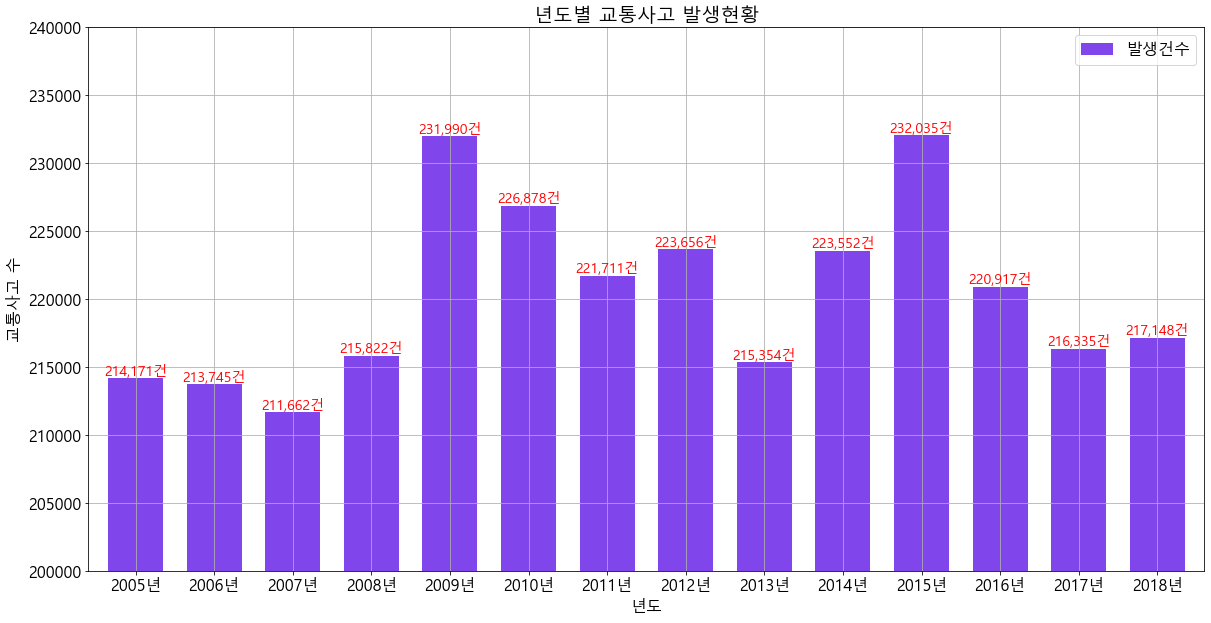

In [39]:
Accident_df['발생건수'].plot.bar(color='#8046eb', rot=0, width=0.7)
plt.grid()
plt.legend()
plt.title("년도별 교통사고 발생현황")
plt.xlabel("년도")
plt.ylabel("교통사고 수")   
plt.xticks(xpos, xtext)

# y축의 범위 설정 / x축의 범위를 설정할 경우 xlim(min,max) 사용
plt.ylim(200000, 240000)

# 그래프에 텍스트 표시하기
# 그래프에 표시되는 실 데이터는 y축 좌표를 의미하고, x축은 0부터 시작하는 좌표값을 갖는다.
for x, y in enumerate( list(Accident_df['발생건수']) ):
    txt = "%s건" % format(y, ",")
    plt.text(x, y, txt, fontsize=14, color='#ff0000', 
                    horizontalalignment='center', verticalalignment='bottom')
    
plt.show()

### 2) 전체 컬럼에 대한 시각화

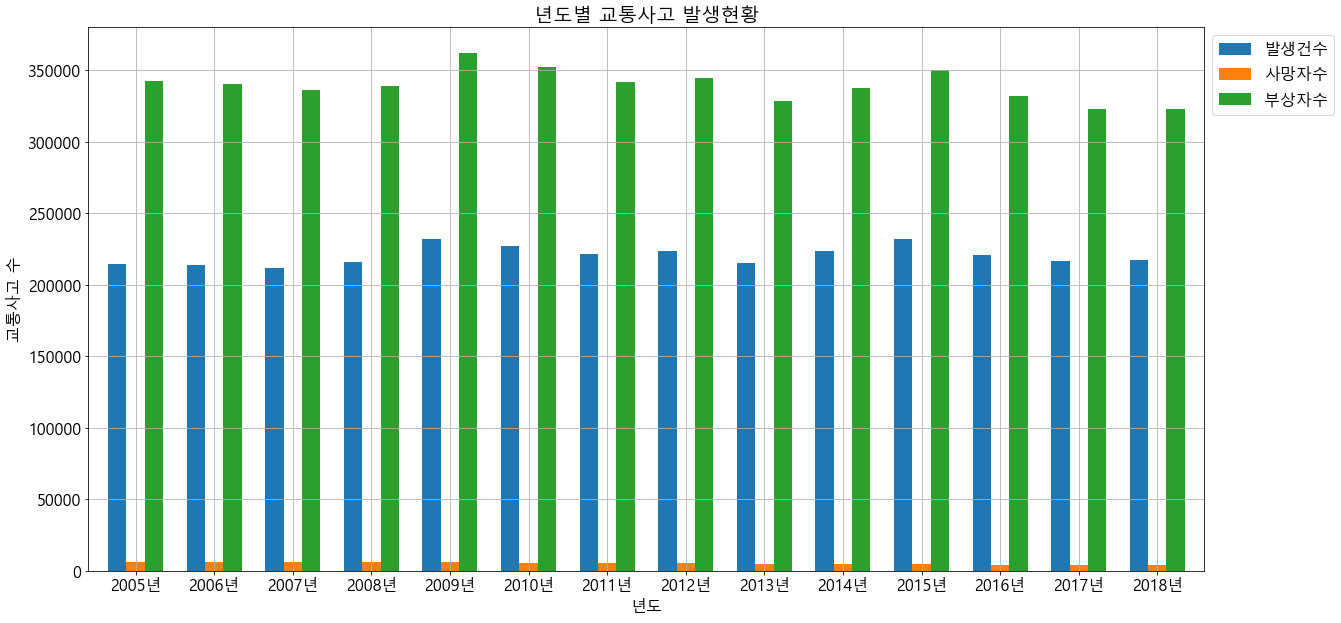

In [43]:
Accident_df.plot.bar(rot = 0, width = 0.7)
plt.grid()

# legend위치 변경
plt.legend(bbox_to_anchor=(1,1))

plt.title("년도별 교통사고 발생현황")
plt.xlabel("년도")
plt.ylabel("교통사고 수")   
plt.xticks(xpos, xtext) 

plt.show()

## 가로 막대 그래프
### 1) 특정 컬럼에 대한 시각화

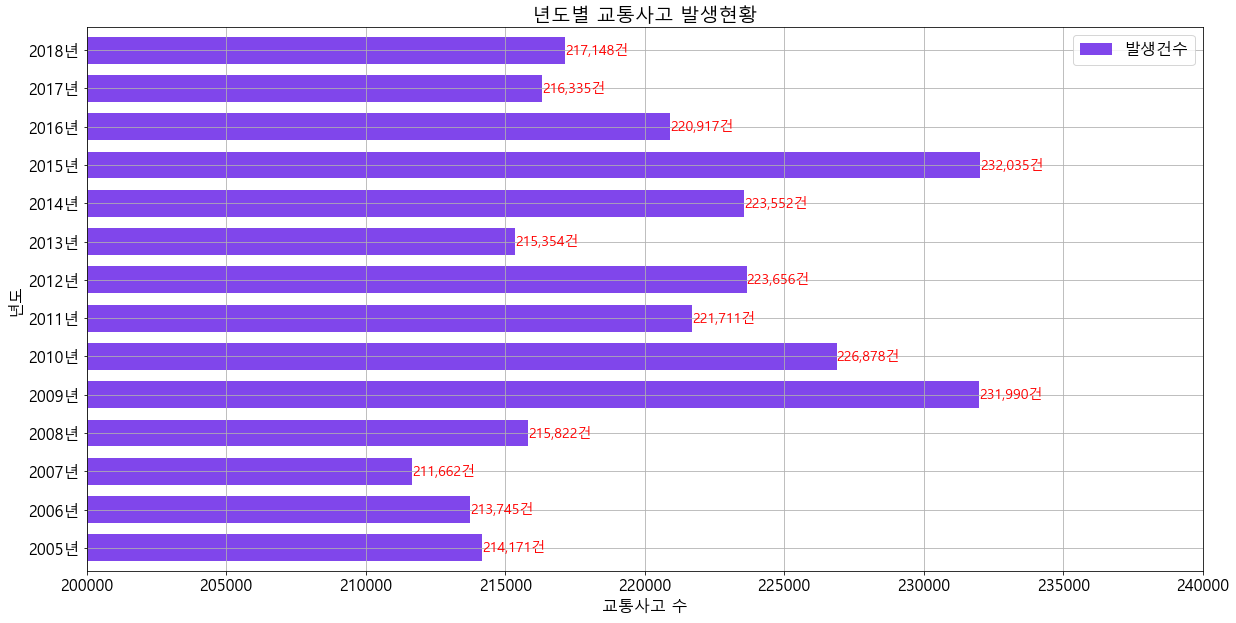

In [45]:
Accident_df['발생건수'].plot.barh(color='#8046eb', rot=0, width=0.7)
plt.grid()
plt.legend()
plt.title("년도별 교통사고 발생현황")
plt.ylabel("년도")
plt.xlabel("교통사고 수")   
plt.yticks(xpos, xtext)

# y축의 범위 설정 / x축의 범위를 설정할 경우 xlim(min,max) 사용
plt.xlim(200000, 240000)

# 그래프에 텍스트 표시하기
# 그래프에 표시되는 실 데이터는 y축 좌표를 의미하고, x축은 0부터 시작하는 좌표값을 갖는다.
for x, y in enumerate( list(Accident_df['발생건수']) ):
    txt = "%s건" % format(y, ",")
    plt.text(y, x, txt, fontsize=14, color='#ff0000', 
                    horizontalalignment='left', verticalalignment='center')
    
plt.show()

### 2) 전체 컬럼에 대한 시각화

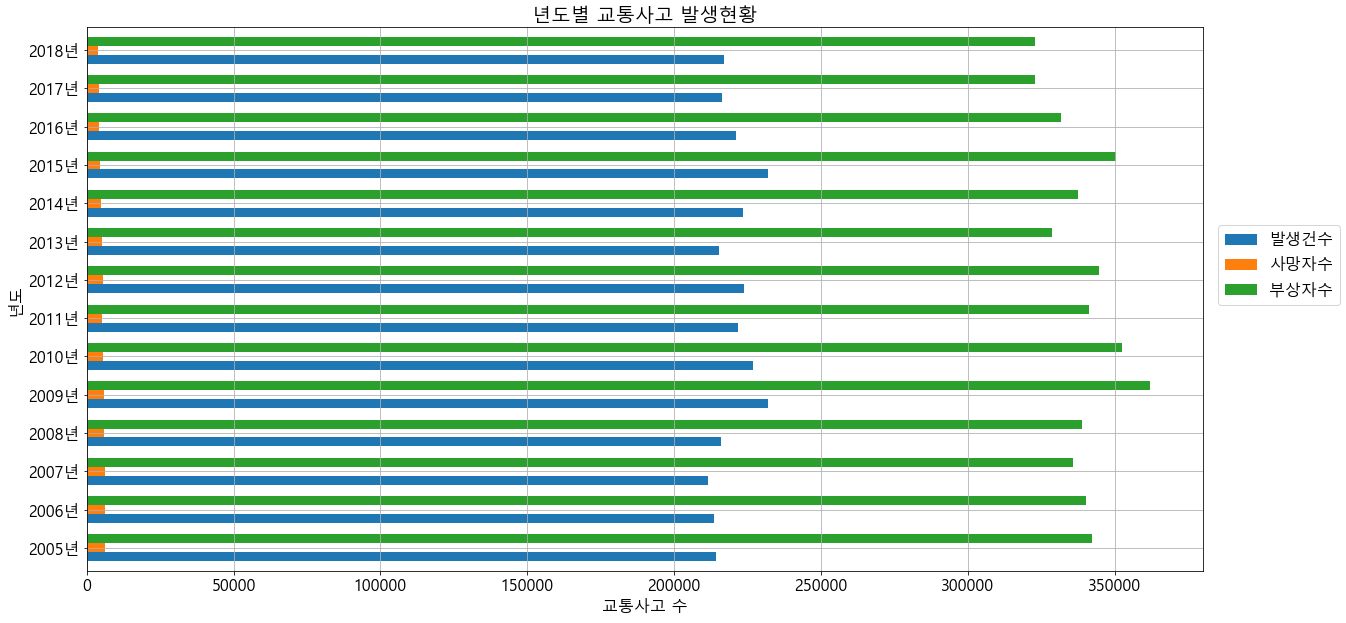

In [46]:
Accident_df.plot.barh(rot=0, width=0.7)
plt.grid()
plt.legend(bbox_to_anchor=(1.13, 0.65))
plt.title("년도별 교통사고 발생현황")
plt.ylabel("년도")
plt.xlabel("교통사고 수")   
plt.yticks(xpos, xtext) 
plt.show()

## 파이 그래프

### 1) 파이 그래프 기본형


In [47]:
Accident_avg = Accident_df.mean()
Accident_avg

발생건수    220355.428571
사망자수      5245.428571
부상자수    339415.214286
dtype: float64

In [48]:
Accident_avg_df = DataFrame(Accident_avg, columns=['교통사고'])
Accident_avg_df

,교통사고
발생건수,220355.428571
사망자수,5245.428571
부상자수,339415.214286


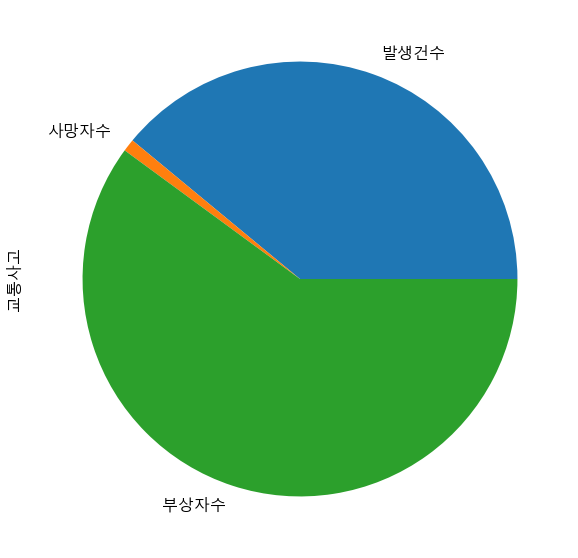

In [49]:
# 데이터프레임의 특정 컬럼에 대한 파이그래프 표시 -> 반드시 특정 컬럼을 지정해야 함
Accident_avg_df['교통사고'].plot.pie()
plt.show()

### 2) 파이 그래프의 옵션 설정

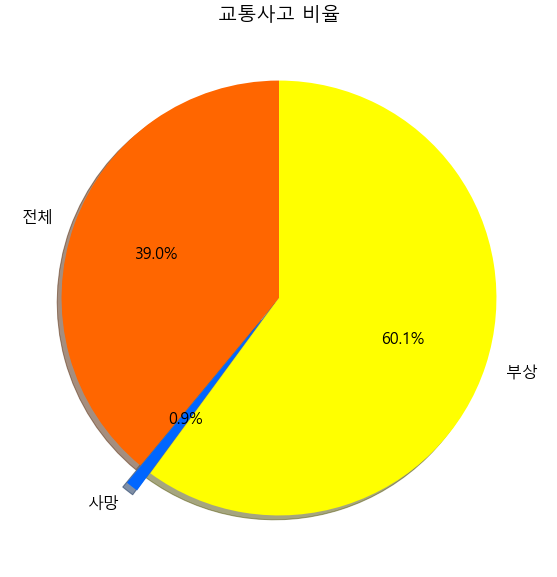

In [52]:
Accident_avg_df['교통사고'].plot.pie(labels=['전체','사망','부상'],
                                colors=['#ff6600', '#0066ff', '#ffff00'],
                                explode=[0.0, 0.1, 0.0],
                                autopct = '%0.1f%%',
                                shadow = True,
                                startangle=90)

plt.title('교통사고 비율')
plt.ylabel(None)
plt.show()

### 3) 출력값에 대한 사용자 정의 함수 만들기

38.99984955787659
0.9283680468797684
60.071784257888794


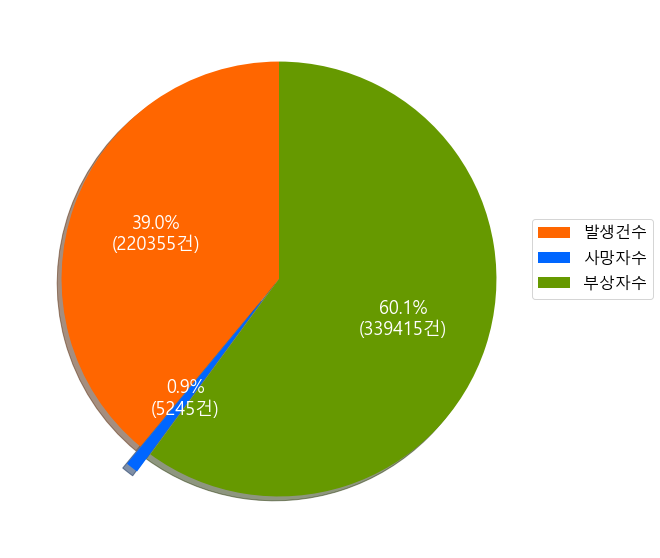

In [53]:
def make_autopct(비율):
    print(비율)
    global Accident_avg_df
    합계 = Accident_avg_df['교통사고'].sum()
    수치 = int(round(비율*합계/100.0))      # 비율과 총합을 사용해서 수치값을 역산한다.
    str = "%0.1f%%\n(%d건)" % (비율, 수치)  # 그래프의 각 섹션에 출력할 문자열 만들기
    return str

# 파이그래프의 각 섹션 수 만큼 `make_autopct`함수가 호출되고 이 함수 안에서는 각 섹션에 출력할 텍스트를 만들어서 리턴한다.
Accident_avg_df['교통사고'].plot.pie(labels=None,
                                 textprops={'color':"#ffffff", 'fontsize': 18},
                                 colors=['#ff6600', '#0066ff', '#669900'], 
                                 explode=[0.0, 0.1, 0.0], 
                                 autopct=make_autopct, 
                                 shadow=True, 
                                 startangle=90)
plt.ylabel(None)

# 범주 지정
# labels -> 각 섹션별 제목
# bbox_to_anchor(x,y) -> 0,0을 기준으로 범주의 위치(2차원 좌표)
plt.legend(labels=list(Accident_avg_df.index), bbox_to_anchor=(0.95, 0.625))

plt.show()

## 산점도 그래프
- 두 변수 간의 영향력을 보여주기 위해 가로 축과 세로 축에 대한 데이터 포인트를 그리는 데 사용된다.
- `데이터 포인트`들이 뭉쳐 있을 수록 두 변수간의 관련성 정도가 높다고 해석한다.

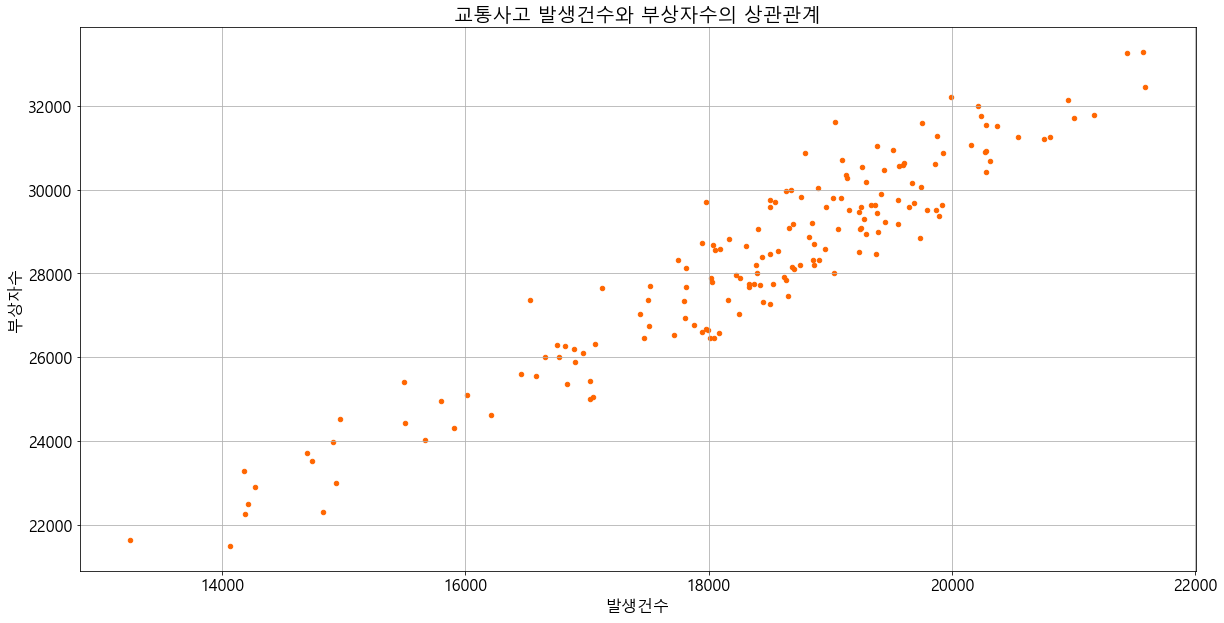

In [54]:
# marker -> o, v, ^, <, >, 8, s, p, *, h, H, D, d, P, X
Accident_csv.plot.scatter(x='발생건수', y='부상자수', color='#ff6600', marker = 'o')
plt.grid()
plt.title("교통사고 발생건수와 부상자수의 상관관계")
plt.ylabel('부상자수')              # y축 라벨
plt.xlabel('발생건수')              # x축 라벨
plt.show()

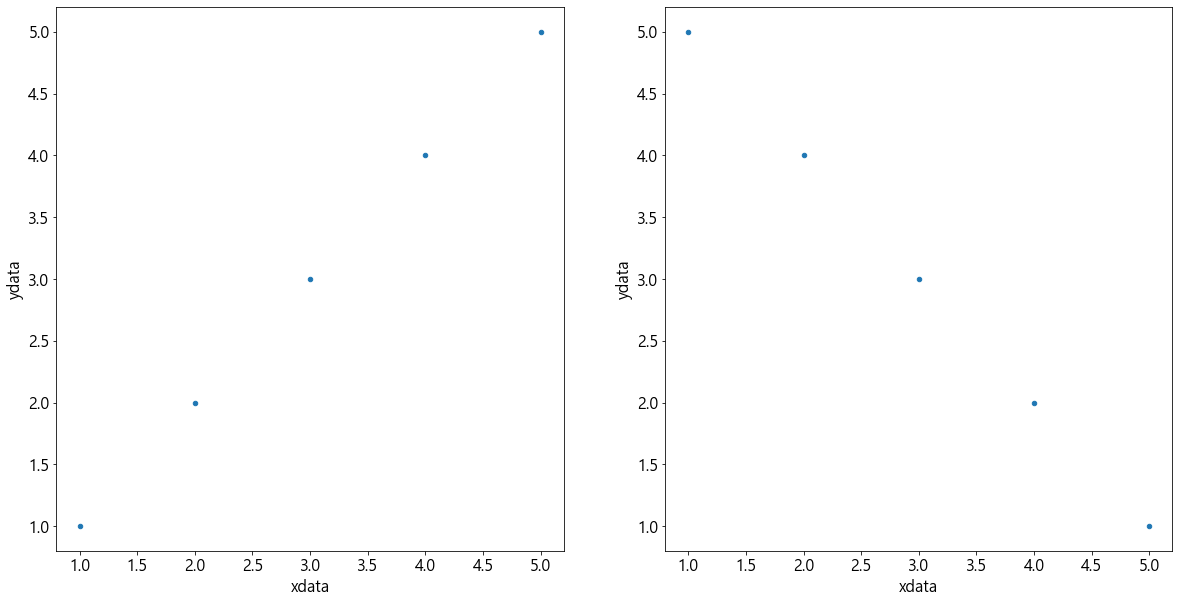

In [84]:

# 정의관계(선형관계)

plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["font.family"] = 'Malgun Gothic'

fig, ax = plt.subplots(1,2, figsize = (20,10))
df = DataFrame({'xdata':[1, 2, 3, 4, 5], 'ydata': [1, 2, 3, 4, 5]})
df.plot.scatter(x='xdata', y='ydata', ax = ax[0])


# 역의관계(선형관계)

df = DataFrame({'xdata':[1, 2, 3, 4, 5], 'ydata': [5,4,3,2,1]})
df.plot.scatter(x='xdata', y='ydata', ax = ax[1])
plt.show()

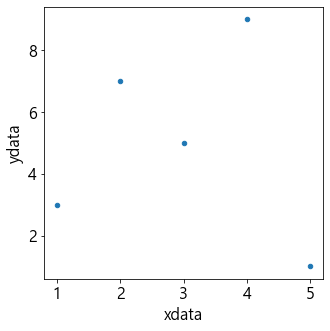

In [62]:
# 비선형관계

df = DataFrame({'xdata':[1, 2, 3, 4, 5], 'ydata': [3, 7, 5, 9, 1]})
df.plot.scatter(x='xdata', y='ydata')
plt.show()

In [63]:
x = Accident_csv['발생건수']
y = Accident_csv['부상자수']

# 추세선을 위한 계산 - 1차원의 polynomial(다항식)을 계산하기 위한 코드.
z = np.polyfit(x, y, 1)   # (X,Y,차원) 정의
f = np.poly1d(z)          # 1차원 다항식에 대한 연산을 캡슐화
f

poly1d([1.40441810e+00, 2.49533855e+03])

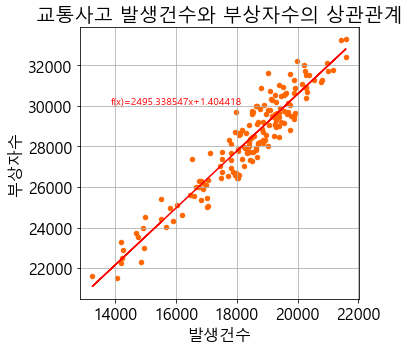

In [67]:

Accident_csv.plot.scatter(x='발생건수', y='부상자수', color='#ff6600', marker='o')
plt.grid()
plt.title("교통사고 발생건수와 부상자수의 상관관계")
plt.ylabel('부상자수')              # y축 라벨
plt.xlabel('발생건수')              # x축 라벨
plt.plot(x,f(x),'#ff0000')         # 추세선

plt.text(16000, 30000, "f(x)=%fx+%f" % (f[0], f[1]), fontsize=10, color='#ff0000', 
                    horizontalalignment='center', verticalalignment='bottom')

plt.show()